### Assignment 4: Text and Sequence Data

**Analysis of Custom versus Pretrained GloVe Embeddings in IMDB Dataset Performance**

Group Members Name: - 

-   Gaurav Kudeshia 
-	Anurodh Singh


In [35]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Sentiment labels, both positive and negative, are assigned to movie reviews within the IMDB dataset.

- During preprocessing, each review undergoes transformation into a sequence of word embeddings. 
- In this process, every word within the review is encoded into a fixed-size vector representation.





In [36]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


**Custom-trained embedding layer with training sample size = 100**

In [37]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_8 (Flatten)         (None, 1200)              0         
                                                                 
 dense_12 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
3/3 [==============================] - 1s 201ms/step - loss: 0.6931 - acc: 0.5125 - val_loss: 0.6983 - val_acc: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 131ms/step - loss: 0.6688 - acc: 0.9000 - val_loss: 0.6988 - val_acc: 0.5000
Epoch 3/30
3/3 [====

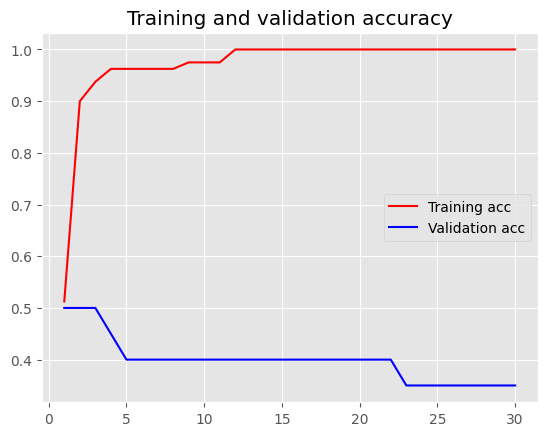

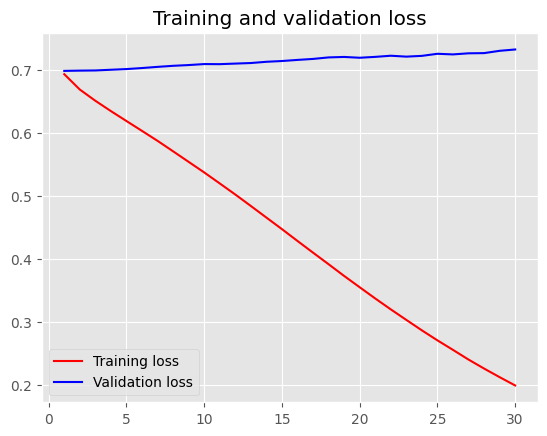

In [38]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [39]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 3ms/step - loss: 0.7030 - acc: 0.5082
Test loss: 0.7030379176139832
Test accuracy: 0.5082399845123291


custom-trained embedding layer with training sample size = 5000

In [40]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [41]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_9 (Flatten)         (None, 1200)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
125/125 [==============================] - 12s 89ms/step - loss: 0.6917 - acc: 0.5188 - val_loss: 0.6877 - val_acc: 0.5570
Epoch 2/30
125/125 [==============================] - 5s 40ms/step - loss: 0.6617 - acc: 0.7178 - val_loss: 0.6596 - val_acc: 0.6950
Epoch 3/30
12

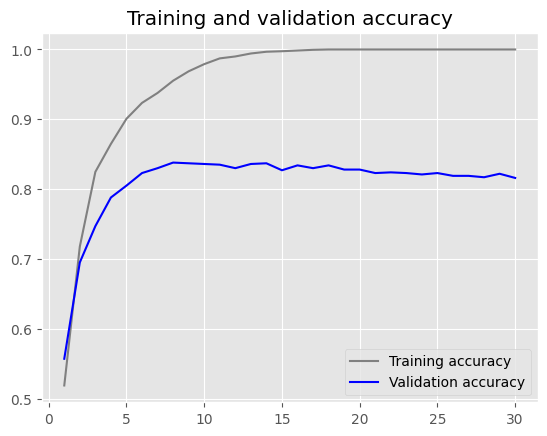

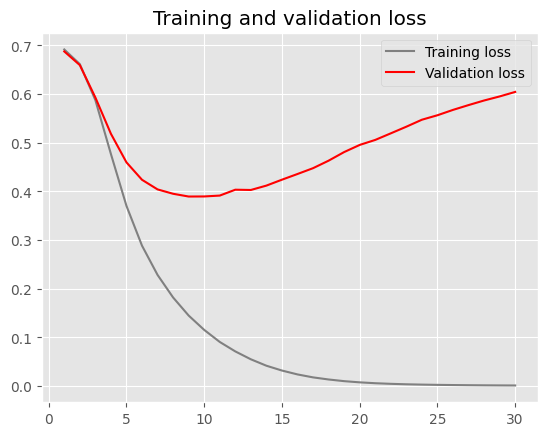

In [42]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 3s 4ms/step - loss: 0.5400 - acc: 0.8243
Test loss: 0.5400031805038452
Test accuracy: 0.8242800235748291


custom-trained embedding layer with training sample size = 1000

In [44]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [45]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_10 (Flatten)        (None, 1200)              0         
                                                                 
 dense_14 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
25/25 [==============================] - 2s 75ms/step - loss: 0.6934 - acc: 0.4950 - val_loss: 0.6904 - val_acc: 0.5800
Epoch 2/30
25/25 [==============================] - 2s 69ms/step - loss: 0.6765 - acc: 0.7800 - val_loss: 0.6893 - val_acc: 0.5850
Epoch 3/30
25/25 

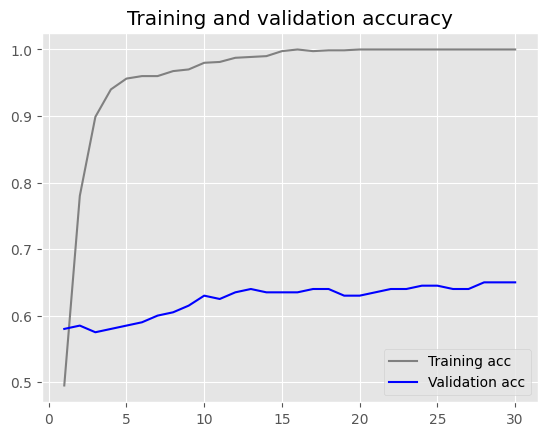

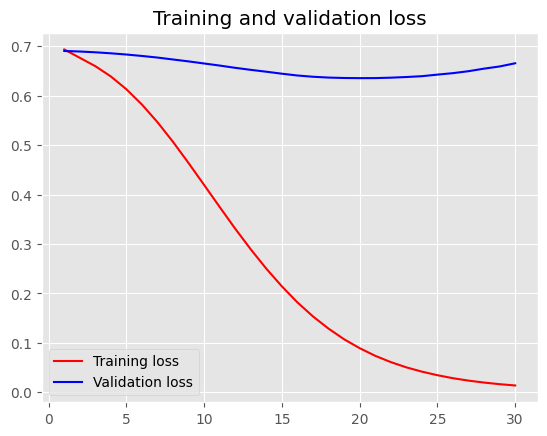

In [46]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [47]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.7461 - acc: 0.5887
Test loss: 0.7461294531822205
Test accuracy: 0.5887200236320496


**Custom-trained embedding layer with training sample size = 10000**

In [50]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [52]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_12 (Flatten)        (None, 1200)              0         
                                                                 
 dense_16 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
250/250 [==============================] - 15s 51ms/step - loss: 0.6878 - acc: 0.5580 - val_loss: 0.6698 - val_acc: 0.6585
Epoch 2/30
250/250 [==============================] - 4s 14ms/step - loss: 0.5810 - acc: 0.7738 - val_loss: 0.5026 - val_acc: 0.8030
Epoch 3/30
2

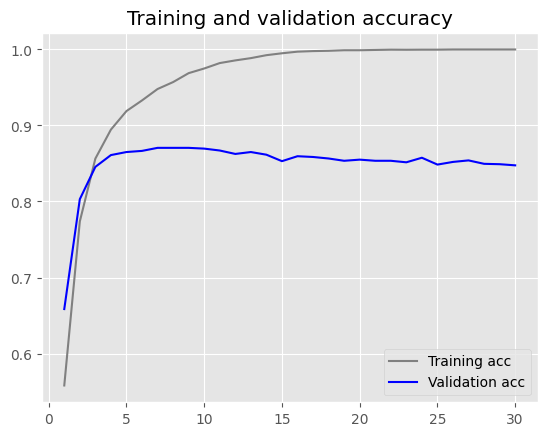

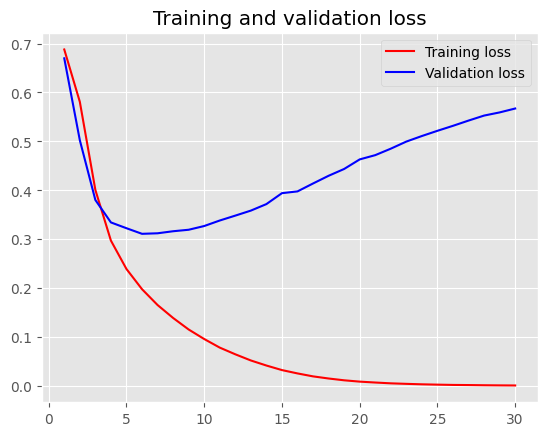

In [54]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [55]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 3s 4ms/step - loss: 0.5802 - acc: 0.8412
Test loss: 0.5802482962608337
Test accuracy: 0.8411999940872192


In [56]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  5254k      0  0:00:15  0:00:15 --:--:-- 12.6M


In [58]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

When there's insufficient training data to generate word embeddings relevant to your specific problem, pretrained word embeddings can be utilized.

The data is tokenized, converting it into a sequence of tokens or words.






Tokenizing the data

In [59]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data] # (200, 100)
y_train = labels[:train_data] # shape (200,)
x_validation = data[train_data:train_data+valid_data] # shape (10000, 100)
y_validation = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [60]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.



Now we will utilize the 6B version of the GloVe model, training it on a combination of Wikipedia data and Gigaword 5. This model is comprised of 6 billion tokens and includes a vocabulary of 400,000 words.

To prepare the GloVe word embeddings matrix, we created a pretrained word embedding layer with a training sample size of 100.

In [61]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [62]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_13 (Flatten)        (None, 15000)             0         
                                                                 
 dense_17 (Dense)            (None, 32)                480032    
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Pretrained word embedding is loaded into the Embeddig layer. When invoking the Embedding layer, setting this to False ensures that it is not trainable. It will be possible for the optimization method to change the word embedding values if you set trainable = True. It is best to avoid updating pretrained sections while students are still being trained to prevent them from forgetting what they already "know".

In [64]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/30
4/4 [==============================] - 6s 654ms/step - loss: 3.2136 - acc: 0.4600 - val_loss: 0.7767 - val_acc: 0.5021
Epoch 2/30
4/4 [==============================] - 1s 202ms/step - loss: 0.5421 - acc: 0.6700 - val_loss: 0.7877 - val_acc: 0.5017
Epoch 3/30
4/4 [==============================] - 1s 220ms/step - loss: 0.6846 - acc: 0.5900 - val_loss: 0.6929 - val_acc: 0.5434
Epoch 4/30
4/4 [==============================] - 1s 220ms/step - loss: 0.2162 - acc: 0.9900 - val_loss: 1.1327 - val_acc: 0.5023
Epoch 5/30
4/4 [==============================] - 1s 220ms/step - loss: 0.2405 - acc: 0.8900 - val_loss: 1.2591 - val_acc: 0.5027
Epoch 6/30
4/4 [==============================] - 1s 222ms/step - loss: 0.2050 - acc: 0.9100 - val_loss: 0.8034 - val_acc: 0.5143
Epoch 7/30
4/4 [==============================] - 1s 219ms/step - loss: 0.0926 - acc: 1.0000 - val_loss: 1.0470 - val_acc: 0.5026
Epoch 8/30
4/4 [==============================] - 1s 221ms/step - loss: 0.0686 - acc: 1.00


With the limited training data available, it's unsurprising to observe rapid overfitting of the model. This phenomenon also explains the significant fluctuation in validation accuracy.

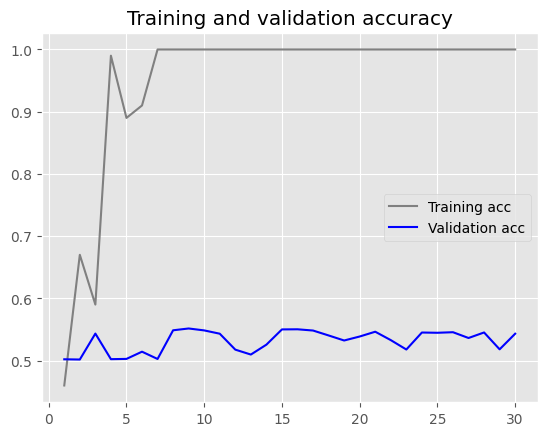

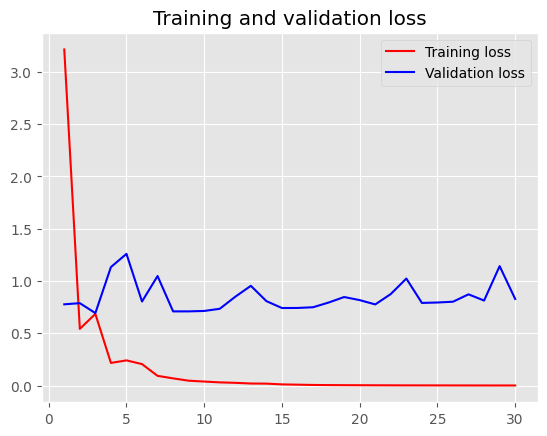

In [65]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.9185 - acc: 0.4984
Test loss: 0.9185347557067871
Test accuracy: 0.4983600080013275


**Pretrained word embedding layer with training sample size = 5000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_14 (Flatten)        (None, 15000)             0         
                                                                 
 dense_19 (Dense)            (None, 32)                480032    
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
157/157 [==============================] -

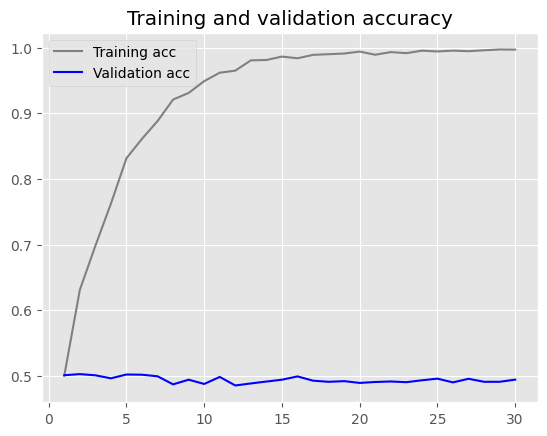

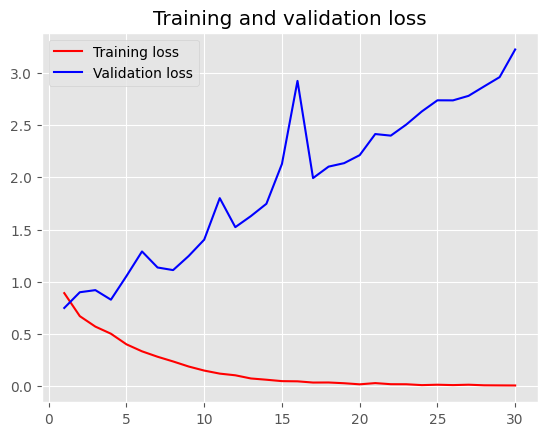

In [67]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000 # Training sample is 5000
valid_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 2s 3ms/step - loss: 3.0951 - acc: 0.5059
Test loss: 3.0950546264648438
Test accuracy: 0.5059199929237366


**Pretrained word embedding layer with training sample size = 1000**

Text preprocessing and training a neural network model for sentiment analysis. It tokenizes and pads input text data, prepares labels, and initializes an embedding matrix. Then, it constructs a neural network model with embedding layer, followed by dense layers. Pre-trained word embeddings (GloVe) are utilized and the model is trained and evaluated, with results visualized using matplotlib.




Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_15 (Flatten)        (None, 15000)             0         
                                                                 
 dense_21 (Dense)            (None, 32)                480032    
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 3

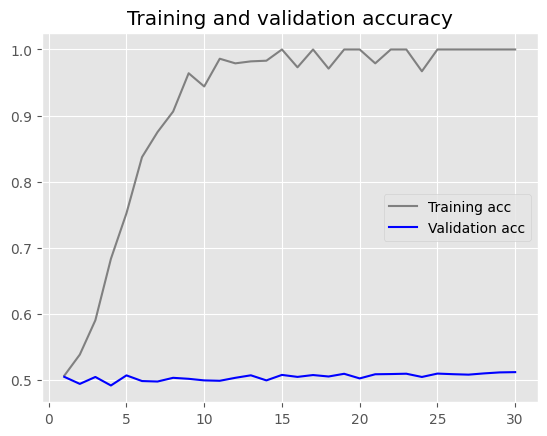

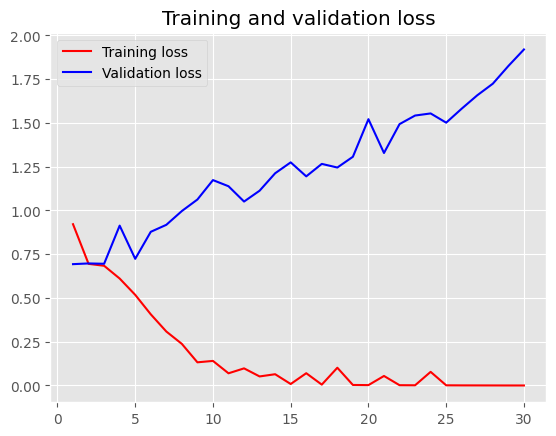

In [69]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 3s 4ms/step - loss: 1.9362 - acc: 0.4993
Test loss: 1.936166763305664
Test accuracy: 0.49932000041007996


**Pretrained word embedding layer with training sample size = 10000**

Preprocessing text data using Keras Tokenizer, preparing it for neural network training. It then creates training and validation datasets, tokenizes text, and pads sequences for uniform length. Next, it sets up an embedding layer, followed by a neural network model with Dense layers. The model is trained, evaluated, and its performance visualized using matplotlib. Finally, the trained model weights are saved.

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_16 (Flatten)        (None, 15000)             0         
                                                                 
 dense_23 (Dense)            (None, 32)                480032    
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
313/313 [==============================] -

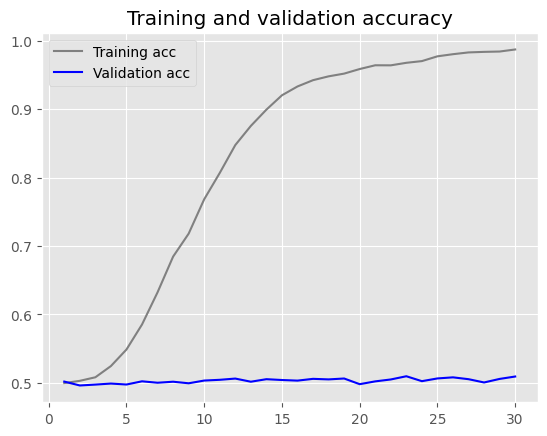

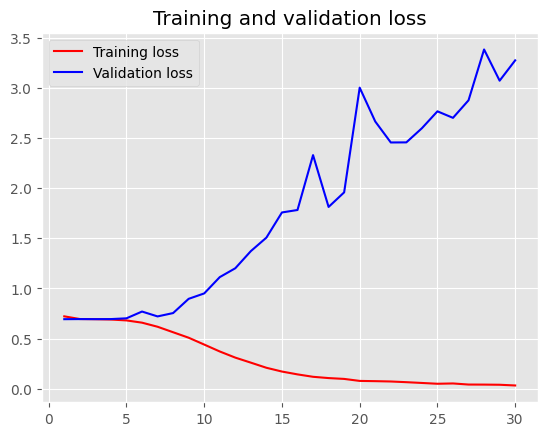

In [71]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 3s 4ms/step - loss: 3.4095 - acc: 0.5077
Test loss: 3.4095077514648438
Test accuracy: 0.5077199935913086
